**Aman Dubal T076**

Aim : Regression and Its Types
1. Implement simple linear regression using a dataset.
2. Explore and interpret the regression model coefficients and goodness-of-fit
measures.
3. Extend the analysis to multiple linear regression and assess the impact of
additional predictors.

# Simple Linear Regression

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df = pd.read_csv('world_happiness_report.csv')
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
# Describe data
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


/tmp/ipython-input-3587068491.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'])


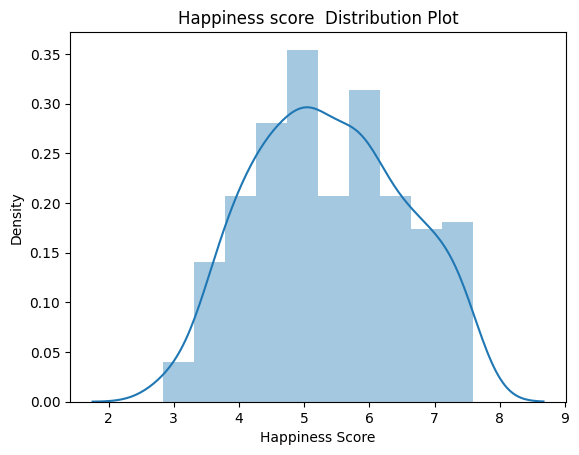

In [ ]:
# Data distribution
plt.title('Happiness score  Distribution Plot')
sns.distplot(df['Happiness Score'])
plt.show()

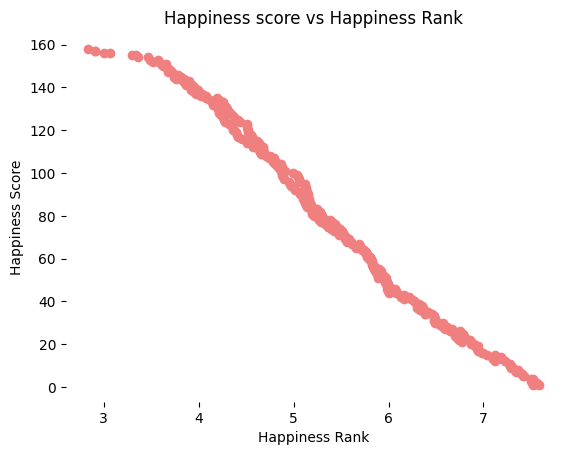

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df['Happiness Score'], df['Happiness Rank'], color = 'lightcoral')
plt.title('Happiness score vs Happiness Rank')
plt.xlabel('Happiness Rank')
plt.ylabel('Happiness Score')
plt.box(False)
plt.show()

In [ ]:
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']
target = 'Happiness Score'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
cols = features + [target]

print("Before:\n", df[cols].isnull().sum())

df[cols] = df[cols].fillna(df[cols].mean())

print("After:\n", df[cols].isnull().sum())

Before:
 Economy (GDP per Capita)    916
Family                      761
Health (Life Expectancy)    916
Freedom                     761
Happiness Score             916
dtype: int64
After:
 Economy (GDP per Capita)    0
Family                      0
Health (Life Expectancy)    0
Freedom                     0
Happiness Score             0
dtype: int64


In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

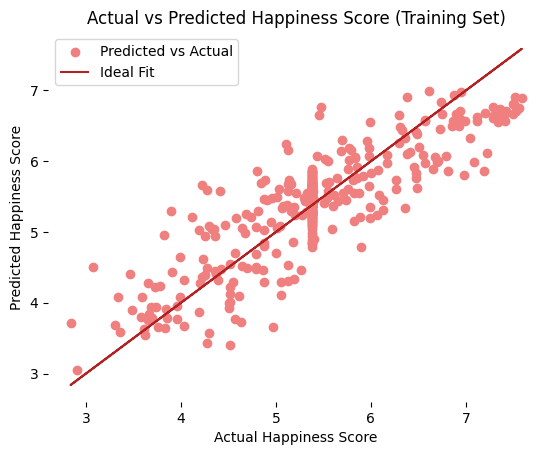

In [ ]:
# Prediction on training set: Actual vs Predicted values
plt.scatter(y_train, y_pred_train, color = 'lightcoral') # Plot actual vs predicted
plt.plot(y_train, y_train, color = 'firebrick') # Plot ideal line (actual == predicted)
plt.title('Actual vs Predicted Happiness Score (Training Set)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.legend(['Predicted vs Actual', 'Ideal Fit'], loc='best', facecolor='white')
plt.box(False)
plt.show()

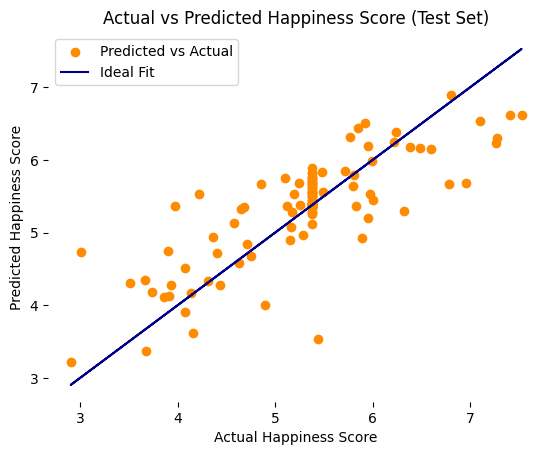

In [ ]:
#print('Predictions on test dataset :\n', y_pred_test[:])

# Prediction on test set: Actual vs Predicted values
plt.scatter(y_test, y_pred_test, color = 'darkorange') # Plot actual vs predicted
plt.plot(y_test, y_test, color = 'darkblue') # Plot ideal line (actual == predicted)
plt.title('Actual vs Predicted Happiness Score (Test Set)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.legend(['Predicted vs Actual', 'Ideal Fit'], loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficients: [1.35340921 0.40191458 1.1394385  1.11737282]
Intercept: 2.6415765450346074


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.12
R-squared: 0.63


# Multiple Linear Regression

In [ ]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)

In [ ]:
# Compare predicted result with actual value
import numpy as np
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1)
result

array([[5.38, 5.38],
       [5.38, 5.38],
       [5.08, 5.16],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.67, 4.86],
       [4.34, 4.31],
       [5.29, 5.38],
       [5.38, 5.38],
       [6.5 , 5.92],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.63, 5.38],
       [5.38, 5.38],
       [5.68, 5.38],
       [5.38, 5.38],
       [5.67, 5.38],
       [5.38, 5.38],
       [5.82, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [4.68, 4.75],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [6.2 , 5.95],
       [5.45, 6.  ],
       [6.17, 6.38],
       [5.38, 5.38],
       [4.58, 4.63],
       [5.67, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.38, 5.38],
       [4.85, 4.71],
       [5.38, 5.38],
       [4.73, 3.01],
       [5.38, 5.38],
       [5.38, 5.38],
       [5.35, 5.38],
       [5.38, 5.38],
       [6.23, 7.27],
       [3.54, 5.44],
       [5.38, 5.38],
       [5.38,